BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Rent of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df=pd.read_csv('House_Rent_Dataset.csv')

In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.describe()
print(df.shape)

(4746, 12)


In [5]:
df=df.sample(frac=1,random_state=42)
print(df.shape)

(4746, 12)


In [6]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1566,2022-06-23,2,16000,1100,2 out of 4,Super Area,"Jaya Nagar Block 7, Jayanagar",Bangalore,Unfurnished,Bachelors/Family,2,Contact Owner
3159,2022-05-12,2,12000,800,2 out of 3,Super Area,Manikandan Nagar,Chennai,Furnished,Bachelors/Family,2,Contact Owner
538,2022-05-10,2,28000,518,5 out of 12,Carpet Area,Bhandup West,Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Owner
2630,2022-06-08,3,8000,1500,1 out of 1,Carpet Area,Cherlopalli TIRUPATI,Delhi,Unfurnished,Bachelors/Family,3,Contact Owner
4418,2022-07-06,3,46000,2235,Ground out of 10,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Family,5,Contact Agent


In [7]:
test=df.tail(1000)
test.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4426,2022-06-29,3,25000,1500,1 out of 2,Carpet Area,"Ayodhya Nagar, Quthbullapur",Hyderabad,Semi-Furnished,Family,3,Contact Owner
466,2022-06-13,3,20000,1200,3 out of 3,Super Area,Bansdroni,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
3092,2022-07-06,2,20000,800,13 out of 17,Carpet Area,Vadapalani,Chennai,Semi-Furnished,Family,2,Contact Agent
3772,2022-05-17,3,85000,3500,Ground out of 1,Carpet Area,T Nagar,Chennai,Semi-Furnished,Bachelors/Family,3,Contact Agent
860,2022-06-20,1,25000,450,5 out of 7,Carpet Area,Goregaon West,Mumbai,Semi-Furnished,Bachelors,2,Contact Agent


In [8]:
df=df.head(3746)
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1566,2022-06-23,2,16000,1100,2 out of 4,Super Area,"Jaya Nagar Block 7, Jayanagar",Bangalore,Unfurnished,Bachelors/Family,2,Contact Owner
3159,2022-05-12,2,12000,800,2 out of 3,Super Area,Manikandan Nagar,Chennai,Furnished,Bachelors/Family,2,Contact Owner
538,2022-05-10,2,28000,518,5 out of 12,Carpet Area,Bhandup West,Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Owner
2630,2022-06-08,3,8000,1500,1 out of 1,Carpet Area,Cherlopalli TIRUPATI,Delhi,Unfurnished,Bachelors/Family,3,Contact Owner
4418,2022-07-06,3,46000,2235,Ground out of 10,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Family,5,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...,...
1854,2022-05-11,2,8900,1100,1 out of 2,Super Area,Sarjapur Road,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
4248,2022-06-22,2,12500,1200,2 out of 5,Super Area,Kompally,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
2872,2022-05-30,2,20000,950,2 out of 3,Carpet Area,"Geeta Colony PRWS Block 3 And 7, Rajgarh Colony",Delhi,Semi-Furnished,Bachelors/Family,2,Contact Owner
3030,2022-05-12,2,14000,1000,1 out of 3,Super Area,Kanathur Reddikuppam,Chennai,Unfurnished,Bachelors/Family,2,Contact Owner


In [9]:
train=df.sample(frac=0.8)
train

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1879,2022-06-20,1,7000,400,Ground out of 2,Super Area,Mathikere,Bangalore,Semi-Furnished,Bachelors/Family,1,Contact Owner
4273,2022-05-20,3,14000,1000,1 out of 2,Super Area,"Malakpet, NH 9",Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
1199,2022-06-27,3,120000,1200,5 out of 14,Carpet Area,"Salvation CHS, Dadar West",Mumbai,Furnished,Bachelors/Family,3,Contact Agent
3873,2022-07-10,3,28000,1050,5 out of 10,Carpet Area,Pallavaram,Chennai,Semi-Furnished,Bachelors/Family,3,Contact Agent
2522,2022-07-03,2,22000,800,3 out of 3,Super Area,Chhattarpur,Delhi,Furnished,Bachelors/Family,2,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
3886,2022-05-30,1,7000,150,Ground out of 2,Super Area,Musheerabad,Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner
1652,2022-05-23,1,7500,600,1 out of 2,Super Area,Bommanahalli,Bangalore,Semi-Furnished,Bachelors/Family,1,Contact Owner
3807,2022-06-11,2,10000,700,Ground out of 2,Super Area,"Zamin Pallavaram, Pallavaram",Chennai,Unfurnished,Bachelors/Family,2,Contact Owner
2963,2022-06-29,2,16500,950,2 out of 4,Carpet Area,"Indraprastha Extension, Patparganj",Delhi,Unfurnished,Bachelors,1,Contact Agent


In [10]:
validation = df[~df.index.isin(train.index)]
print(validation.dtypes)
print(validation.count())

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object
Posted On            749
BHK                  749
Rent                 749
Size                 749
Floor                749
Area Type            749
Area Locality        749
City                 749
Furnishing Status    749
Tenant Preferred     749
Bathroom             749
Point of Contact     749
dtype: int64


Data Cleaning

In [11]:
train.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1879,2022-06-20,1,7000,400,Ground out of 2,Super Area,Mathikere,Bangalore,Semi-Furnished,Bachelors/Family,1,Contact Owner
4273,2022-05-20,3,14000,1000,1 out of 2,Super Area,"Malakpet, NH 9",Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
1199,2022-06-27,3,120000,1200,5 out of 14,Carpet Area,"Salvation CHS, Dadar West",Mumbai,Furnished,Bachelors/Family,3,Contact Agent
3873,2022-07-10,3,28000,1050,5 out of 10,Carpet Area,Pallavaram,Chennai,Semi-Furnished,Bachelors/Family,3,Contact Agent
2522,2022-07-03,2,22000,800,3 out of 3,Super Area,Chhattarpur,Delhi,Furnished,Bachelors/Family,2,Contact Owner


In [12]:
train.drop(['Point of Contact'],axis=1)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
1879,2022-06-20,1,7000,400,Ground out of 2,Super Area,Mathikere,Bangalore,Semi-Furnished,Bachelors/Family,1
4273,2022-05-20,3,14000,1000,1 out of 2,Super Area,"Malakpet, NH 9",Hyderabad,Unfurnished,Bachelors/Family,2
1199,2022-06-27,3,120000,1200,5 out of 14,Carpet Area,"Salvation CHS, Dadar West",Mumbai,Furnished,Bachelors/Family,3
3873,2022-07-10,3,28000,1050,5 out of 10,Carpet Area,Pallavaram,Chennai,Semi-Furnished,Bachelors/Family,3
2522,2022-07-03,2,22000,800,3 out of 3,Super Area,Chhattarpur,Delhi,Furnished,Bachelors/Family,2
...,...,...,...,...,...,...,...,...,...,...,...
3886,2022-05-30,1,7000,150,Ground out of 2,Super Area,Musheerabad,Hyderabad,Unfurnished,Bachelors/Family,1
1652,2022-05-23,1,7500,600,1 out of 2,Super Area,Bommanahalli,Bangalore,Semi-Furnished,Bachelors/Family,1
3807,2022-06-11,2,10000,700,Ground out of 2,Super Area,"Zamin Pallavaram, Pallavaram",Chennai,Unfurnished,Bachelors/Family,2
2963,2022-06-29,2,16500,950,2 out of 4,Carpet Area,"Indraprastha Extension, Patparganj",Delhi,Unfurnished,Bachelors,1


<AxesSubplot:>

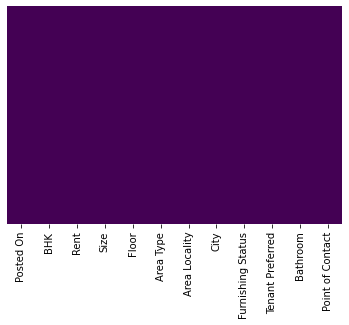

In [61]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
train.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [15]:
print(train['Furnishing Status'].unique())

['Semi-Furnished' 'Unfurnished' 'Furnished']


In [16]:
# Furnishing Status -> unfurnished 0 semi-furnished 1 furnished 2
train.loc[train["Furnishing Status"] == "Furnished", "Furnishing Status"] = 2
train.loc[train["Furnishing Status"] == "Semi-Furnished", "Furnishing Status"] = 1
train.loc[train["Furnishing Status"] == "Unfurnished", "Furnishing Status"] = 0
train['Furnishing Status']

1879    1
4273    0
1199    2
3873    1
2522    2
       ..
3886    0
1652    1
3807    0
2963    0
3799    0
Name: Furnishing Status, Length: 2997, dtype: object

In [17]:
test.loc[test["Furnishing Status"] == "Furnished", "Furnishing Status"] = 2
test.loc[test["Furnishing Status"] == "Semi-Furnished", "Furnishing Status"] = 1
test.loc[test["Furnishing Status"] == "Unfurnished", "Furnishing Status"] = 0
test['Furnishing Status']

2467    1
1645    1
3417    0
3476    1
3941    1
       ..
4426    1
466     0
3092    1
3772    1
860     1
Name: Furnishing Status, Length: 1000, dtype: object

Exploaratory Analysis

[]

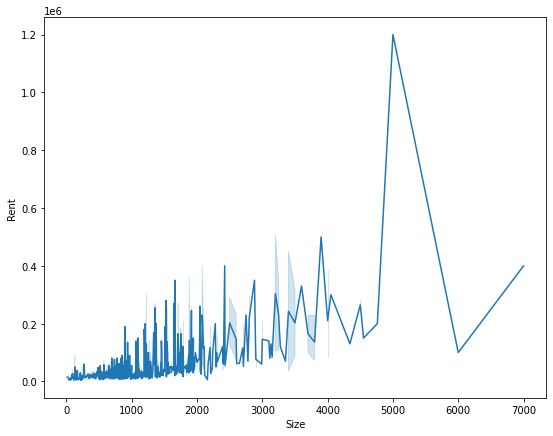

In [21]:
plt.figure(figsize=(9, 7))
sns.lineplot(x ='Size', y ='Rent', data = train)
plt.plot()
#scatter 

In [19]:
cities=train['City'].unique()
print(cities)

['Bangalore' 'Hyderabad' 'Mumbai' 'Chennai' 'Delhi' 'Kolkata']


In [20]:
max=0
high=""
for i in cities:
  val=round(train[train['City']==i]['Rent'].mean(),3)
  if(val>max):
    max=val
    high=i
  print(i," --> Rs.",val)

print("Highest Average Rent is in ",high)

Bangalore  --> Rs. 21449.544
Hyderabad  --> Rs. 20417.158
Mumbai  --> Rs. 86410.592
Chennai  --> Rs. 21449.697
Delhi  --> Rs. 31445.799
Kolkata  --> Rs. 11599.312
Highest Average Rent is in  Mumbai


Regression

In [28]:
model = LinearRegression()

In [48]:
x_train=train['Size']
x_train = np.squeeze(x_train)
x_train = np.reshape(x_train.to_numpy(), (-1, 1))
print(x_train.shape)
model.fit(x_train, train['Rent'])
print(train['Rent'])

(2997, 1)
1879      7000
4273     14000
1199    120000
3873     28000
2522     22000
         ...  
3886      7000
1652      7500
3807     10000
2963     16500
3799     70000
Name: Rent, Length: 2997, dtype: int64


In [51]:
print(model.coef_)

[51.3257459]


In [52]:
print(model.intercept_)

-14882.081996177367


In [53]:
x_test=validation[['Size']]
print(x_test)

      Size
3159   800
1344  2500
4031   800
4253  1250
1744   500
...    ...
3208  1500
3502  1800
1854  1100
4248  1200
1205  1130

[749 rows x 1 columns]


In [54]:
y_test=validation['Rent']

In [55]:
predictions = model.predict(x_test)

In [56]:
metrics.mean_absolute_error(y_test, predictions)

31219.225906170712

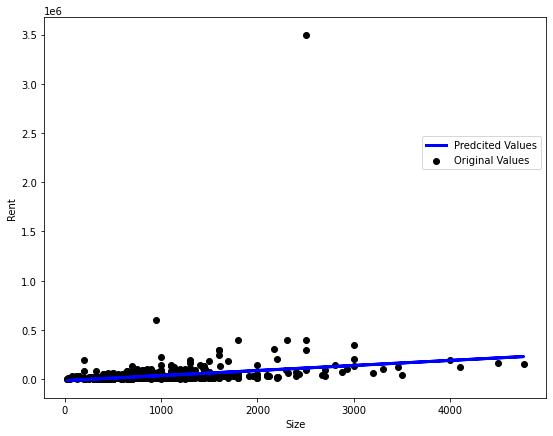

In [57]:
plt.figure(figsize=(9, 7))
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, predictions, color='blue', linewidth=3)
plt.xlabel('Size')
plt.ylabel('Rent')
plt.legend(['Predcited Values','Original Values'],bbox_to_anchor =(1.0, 0.7))
plt.show()

In [58]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

132269.59809722926

In [59]:
print(predictions)

[ 2.61785147e+04  1.13432283e+05  2.61785147e+04  4.92751004e+04
  1.07807910e+04  8.21450366e+03  5.64821636e+03  2.87448020e+04
  4.97883578e+04  1.07807910e+04  3.64436639e+04  1.39095156e+05
  2.10459401e+04  2.10459401e+04  1.59133655e+04  8.21450366e+03
  1.33470782e+04  2.87448020e+04 -7.18322011e+03  3.13110893e+04
  6.21065368e+04  1.95810105e+05  2.77182871e+04  2.10459401e+04
  5.69739623e+04  1.48868506e+04  1.59133655e+04  5.64821636e+03
  5.97455525e+04  1.08299708e+05  5.95402496e+04  1.39095156e+05
  4.97883578e+04  1.59133655e+04  1.95061678e+04  5.44076750e+04
  1.59133655e+04 -1.20591660e+04  2.36122274e+04  1.59133655e+04
  2.87448020e+04  4.90697974e+04  3.08192907e+03 -1.07760223e+04
  2.10459401e+04  2.61785147e+04 -7.69647757e+03  1.07807910e+04
  1.59133655e+04  2.10459401e+04  5.69739623e+04  1.70938577e+04
  4.67088131e+04  2.61785147e+04  3.74701788e+04  2.10459401e+04
  3.13110893e+04  4.15762385e+04  2.10459401e+04  4.15762385e+04
  2.87448020e+04  4.61955